In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
%matplotlib inline

In [114]:
df = pd.read_csv('balance.txt', delimiter= ",")
df = pd.get_dummies(df)

df.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,1,0,1,0,0,1,0,0,1
1,2,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,1,0
2,3,104.593,7075,514,4,71,11,580,1,0,1,0,1,0,0,1,0
3,4,148.924,9504,681,3,36,11,964,0,1,1,0,1,0,0,1,0
4,5,55.882,4897,357,2,68,16,331,1,0,1,0,0,1,0,0,1


In [115]:
df.describe().T  ##nothing missing

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400.0,200.500000,115.614301,1.000,100.75000,200.5000,300.25000,400.000
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000
Gender_ Male,400.0,0.482500,0.500319,0.000,0.00000,0.0000,1.00000,1.000
Gender_Female,400.0,0.517500,0.500319,0.000,0.00000,1.0000,1.00000,1.000


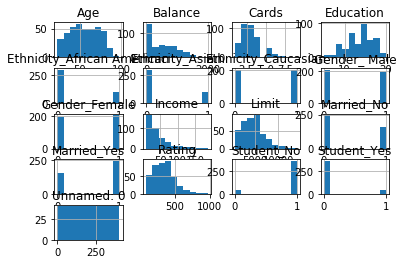

In [116]:
df.hist();

In [117]:
cust_id = list(df['Unnamed: 0'])

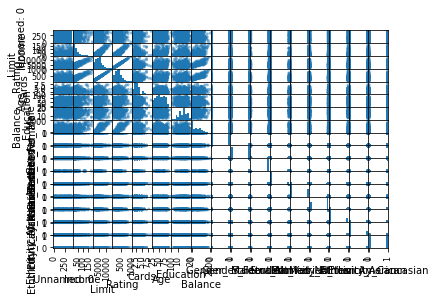

In [118]:
scatter_matrix(df);

In [119]:
df.corr()['Rating'].sort_values(ascending = False)
##Rating, Limit, and (to a lesser extent) Income seem to matter quite a bit
##Keep one of limit, rating since corr is almost 1 between the two

Rating                        1.000000
Limit                         0.996880
Balance                       0.863625
Income                        0.791378
Age                           0.103165
Cards                         0.053239
Ethnicity_African American    0.037598
Married_Yes                   0.036751
Unnamed: 0                    0.021985
Gender_Female                 0.008885
Student_No                    0.002028
Ethnicity_Caucasian          -0.001070
Student_Yes                  -0.002028
Gender_ Male                 -0.008885
Education                    -0.030136
Ethnicity_Asian              -0.035999
Married_No                   -0.036751
Name: Rating, dtype: float64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
Unnamed: 0                    400 non-null int64
Income                        400 non-null float64
Limit                         400 non-null int64
Rating                        400 non-null int64
Cards                         400 non-null int64
Age                           400 non-null int64
Education                     400 non-null int64
Balance                       400 non-null int64
Gender_ Male                  400 non-null uint8
Gender_Female                 400 non-null uint8
Student_No                    400 non-null uint8
Student_Yes                   400 non-null uint8
Married_No                    400 non-null uint8
Married_Yes                   400 non-null uint8
Ethnicity_African American    400 non-null uint8
Ethnicity_Asian               400 non-null uint8
Ethnicity_Caucasian           400 non-null uint8
dtypes: float64(1), int64(7), uint8(9)
memory usage: 28.6 KB

In [121]:
#Standardize Variables before clustering
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Balance', 'Limit',  'Income']])
df_std = std_scale.transform(df[['Balance', 'Limit', 'Income']])

In [122]:
#Clustering woudl be a great way to understand segments
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
mergings = linkage(df_std, method = 'complete')

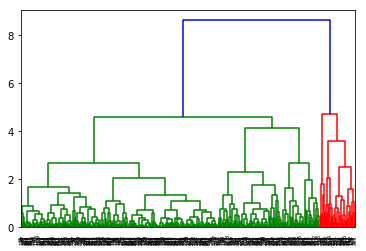

In [123]:
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=cust_id,
           leaf_rotation=90,
           leaf_font_size=5,
)
plt.show()


In [124]:
from sklearn.cluster import AgglomerativeClustering

# Use AgglomerativeClustering to extract labels: labels
model = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
model.fit(df_std)
labels = model.labels_


In [125]:
#add cluster labels back to original dataframe
df['clust'] = labels + 1


In [126]:
df_c1 = df[df.clust == 1]
df_c2 = df[df.clust == 2]
df_c3 = df[df.clust == 3]
df_c4 = df[df.clust == 4]
df_c5 = df[df.clust == 5]


In [127]:
df_c1.describe().T #Cluster Labels: 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,172.0,202.575581,114.345737,1.000,100.5000,207.500,301.25000,398.000
Income,172.0,36.447988,19.644781,10.354,20.6475,32.905,51.39175,92.112
Limit,172.0,4218.000000,801.995654,2433.000,3519.5000,4246.000,4903.50000,6127.000
Rating,172.0,319.755814,53.459377,190.000,279.0000,320.000,365.00000,440.000
Cards,172.0,2.924419,1.459026,1.000,2.0000,3.000,4.00000,9.000
Age,172.0,54.383721,17.215639,23.000,39.7500,53.500,69.00000,86.000
Education,172.0,13.436047,3.235672,6.000,11.0000,14.000,16.00000,20.000
Balance,172.0,374.569767,225.636827,0.000,187.7500,381.000,562.50000,902.000
Gender_ Male,172.0,0.505814,0.501426,0.000,0.0000,1.000,1.00000,1.000
Gender_Female,172.0,0.494186,0.501426,0.000,0.0000,0.000,1.00000,1.000


In [128]:
df_c2.describe().T #Cluster Labels: Elite Status

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,59.0,197.644068,130.736213,2.000,88.5000,197.000,315.5000,395.00
Income,59.0,74.098000,21.977726,42.079,58.0955,69.656,89.7505,128.04
Limit,59.0,7061.576271,704.665541,5354.000,6621.5000,7075.000,7562.0000,8603.00
Rating,59.0,509.847458,49.705968,383.000,480.0000,512.000,540.5000,621.00
Cards,59.0,2.762712,1.193936,1.000,2.0000,3.000,3.5000,6.00
Age,59.0,58.406780,17.176687,28.000,44.0000,56.000,73.5000,87.00
Education,59.0,12.949153,3.053679,6.000,11.0000,14.000,15.0000,19.00
Balance,59.0,931.711864,272.925659,227.000,767.5000,903.000,1085.0000,1587.00
Gender_ Male,59.0,0.474576,0.503640,0.000,0.0000,0.000,1.0000,1.00
Gender_Female,59.0,0.525424,0.503640,0.000,0.0000,1.000,1.0000,1.00


In [129]:
df_c3.describe().T #Problem Cluster

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,29.0,198.275862,117.418633,4.000,104.000,192.000,315.000,391.000
Income,29.0,137.860310,27.142447,83.851,121.834,135.118,152.298,186.634
Limit,29.0,10004.344828,1530.333280,7659.000,9113.000,9704.000,10673.000,13913.000
Rating,29.0,709.241379,103.659007,538.000,636.000,694.000,750.000,982.000
Cards,29.0,3.103448,1.611229,1.000,2.000,3.000,4.000,7.000
Age,29.0,63.172414,18.226882,36.000,47.000,66.000,80.000,98.000
Education,29.0,14.000000,3.240370,7.000,12.000,15.000,17.000,19.000
Balance,29.0,1269.827586,380.375761,454.000,1107.000,1311.000,1448.000,1999.000
Gender_ Male,29.0,0.551724,0.506120,0.000,0.000,1.000,1.000,1.000
Gender_Female,29.0,0.448276,0.506120,0.000,0.000,0.000,1.000,1.000


In [130]:
df_c4.describe().T #Upper Middle Class - bank necessities

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90.0,197.600000,107.964081,12.000,119.2500,191.5000,284.2500,399.000
Income,90.0,23.910322,8.540442,10.363,16.6015,23.4075,29.8925,44.522
Limit,90.0,2012.700000,602.856001,855.000,1503.5000,2060.0000,2528.0000,3206.000
Rating,90.0,172.888889,37.527950,93.000,142.0000,173.0000,199.7500,254.000
Cards,90.0,2.855556,1.195132,1.000,2.0000,3.0000,3.7500,6.000
Age,90.0,55.366667,16.781109,24.000,41.2500,57.5000,70.0000,82.000
Education,90.0,13.644444,2.869096,6.000,11.2500,14.0000,16.0000,19.000
Balance,90.0,11.277778,34.511365,0.000,0.0000,0.0000,0.0000,195.000
Gender_ Male,90.0,0.488889,0.502677,0.000,0.0000,0.0000,1.0000,1.000
Gender_Female,90.0,0.511111,0.502677,0.000,0.0000,1.0000,1.0000,1.000


In [131]:
df_c5.describe().T #High activity/balance relative to income -- posers

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50.0,203.2400,117.820957,22.000,94.7500,210.0000,305.500,400.000
Income,50.0,25.9368,8.703025,10.842,18.9085,26.4135,33.602,44.847
Limit,50.0,5616.8400,508.341656,4391.000,5380.5000,5588.0000,5880.250,6827.000
Rating,50.0,415.3800,34.738022,329.000,389.0000,413.0000,441.250,482.000
Cards,50.0,3.4000,1.355262,1.000,2.2500,3.5000,4.000,6.000
Age,50.0,53.0400,16.814668,24.000,40.5000,52.5000,66.750,81.000
Education,50.0,13.4200,3.233056,5.000,11.2500,14.5000,16.000,18.000
Balance,50.0,1015.3800,183.549681,772.000,893.0000,966.5000,1092.750,1549.000
Gender_ Male,50.0,0.3600,0.484873,0.000,0.0000,0.0000,1.000,1.000
Gender_Female,50.0,0.6400,0.484873,0.000,0.0000,1.0000,1.000,1.000


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,clust
21,22,37.348,6378,458,1,72,17,968,0,1,1,0,1,0,0,0,1,5
29,30,26.813,5611,411,4,55,16,915,0,1,1,0,1,0,0,0,1,5
30,31,34.142,5666,413,4,47,5,863,0,1,1,0,0,1,0,0,1,5
37,38,30.007,6481,462,2,69,9,1093,0,1,1,0,0,1,0,0,1,5
43,44,36.929,6257,445,1,24,14,976,0,1,1,0,0,1,0,1,0,5
44,45,31.861,6375,469,3,25,16,1120,0,1,1,0,0,1,0,0,1,5
46,47,19.531,5043,376,2,64,16,1241,0,1,0,1,0,1,0,1,0,5
53,54,16.304,5466,413,4,66,10,957,1,0,1,0,0,1,0,1,0,5
67,68,11.187,5099,380,4,69,16,889,0,1,1,0,1,0,1,0,0,5
68,69,27.847,5619,418,2,78,15,822,0,1,1,0,0,1,0,0,1,5


In [ ]:
#Cluster labels

#Cluster 1: Lower Middle Customers
#Cluster 2: Upper Middle Customers
#Cluster 3: Best Customers / Premier Customers 
#Cluster 4: Low Activity Customers/Hosed Customers 
#Cluster 5: High Activity/Pushing their limits customers 

#To be continued (with more time): demographic analysis of all 5 clusters
